In [2]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pandas as pd

In [3]:
countries = pd.read_csv('worldcities.csv')
countries.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519


In [4]:
#using geopandas convert longitude and latitude to points
countries_geo = gpd.GeoDataFrame(countries, 
                                 geometry = gpd.points_from_xy(countries.lng,
                                                              countries.lat))

In [5]:
countries_geo.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,geometry
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764,POINT (139.77440 35.68390)
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077,POINT (106.84510 -6.21460)
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604,POINT (77.21670 28.66670)
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140,POINT (120.98330 14.60000)
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519,POINT (-46.63390 -23.55040)


In [6]:
#to plot the data use the built in world dataset from geopandas
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

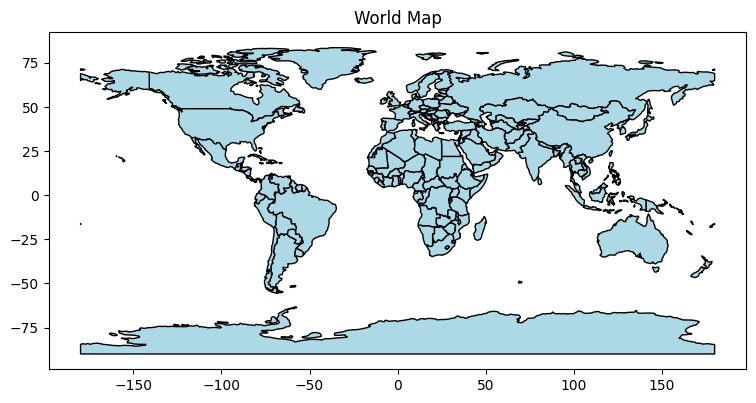

In [7]:
#plot world map
axis = world_data.plot(
    color ='lightblue',edgecolor='black')

# countries_geo.plot(ax = axis, color = 'white')
plt.title('World Map')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(9,6)
fig.savefig('matplot.png', dpi =200)
plt.show()

In [15]:
#visualize in a choropleth map
f = px.choropleth(countries,
                 locationmode= 'country names',
                 locations = countries['country'],
                 scope = 'world',
#                  color = countries['country'],
                 color = countries['population'])

f.show()